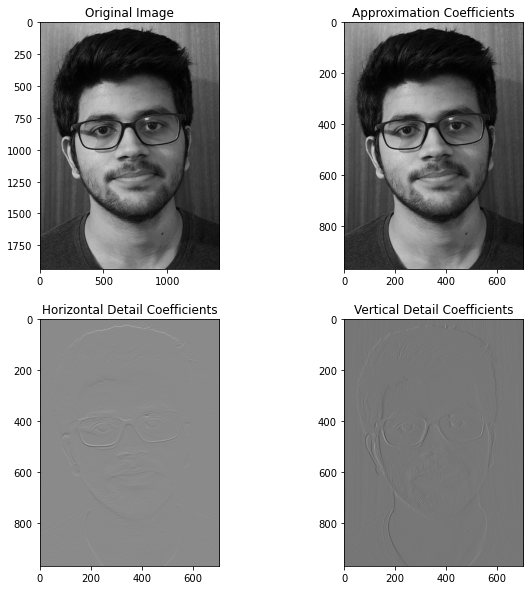

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from PIL import Image

# Load image
img = Image.open('Panini.jpg').convert('L') # convert to grayscale
img = np.array(img)

# Perform 2D wavelet transform
coeffs = pywt.dwt2(img, 'haar')

# Separate coefficients and approximation
cA, (cH, cV, cD) = coeffs

# Display original image and wavelet coefficients
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(cA, cmap='gray')
axs[0, 1].set_title('Approximation Coefficients')
axs[1, 0].imshow(cH, cmap='gray')
axs[1, 0].set_title('Horizontal Detail Coefficients')
axs[1, 1].imshow(cV, cmap='gray')
axs[1, 1].set_title('Vertical Detail Coefficients')
plt.show()


In [34]:
# These are the wavelet filter (f_i 's)

import numpy as np

# Define the 1D tensors
h1 = np.array([1, 2, 1])
h2 = np.array([1, 0, -1])
h3 = np.array([-1, 2, -1])

# Compute the tensor product of each pair of 1D tensors
H = [np.outer(hi, hj) for hi in [h1, h2, h3] for hj in [h1, h2, h3]]

# Print the resulting 2D filters
print("The wavelet filters are - ")
for i, h in enumerate(H):
    print(f'Filter {i+1}:')
    print(h)
    print()


The wavelet filters are - 
Filter 1:
[[1 2 1]
 [2 4 2]
 [1 2 1]]

Filter 2:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

Filter 3:
[[-1  2 -1]
 [-2  4 -2]
 [-1  2 -1]]

Filter 4:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]

Filter 5:
[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]

Filter 6:
[[-1  2 -1]
 [ 0  0  0]
 [ 1 -2  1]]

Filter 7:
[[-1 -2 -1]
 [ 2  4  2]
 [-1 -2 -1]]

Filter 8:
[[-1  0  1]
 [ 2  0 -2]
 [-1  0  1]]

Filter 9:
[[ 1 -2  1]
 [-2  4 -2]
 [ 1 -2  1]]



(1939, 1407)


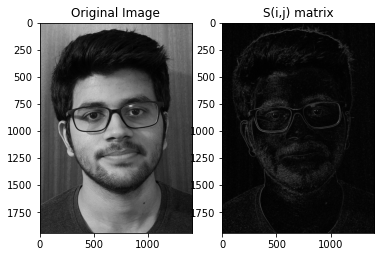

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
img = cv2.imread('Panini.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the gradient along the x-axis
grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)

# Compute the gradient along the y-axis
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Compute the sum of squared values for each pixel
grad_mag = np.sqrt(grad_x**2 + grad_y**2)
print(img.shape)

# Normalize the array to be in the range [0, 255]
grad_mag_norm = (grad_mag - np.min(grad_mag)) * 255 / (np.max(grad_mag) - np.min(grad_mag))

# Display the result as an image
# plt.imshow(grad_mag_norm, cmap='gray')
# plt.show()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2)

# Plot the original image in the left subplot
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')

# Plot the normalized image in the right subplot
axs[1].imshow(grad_mag_norm, cmap='gray')
axs[1].set_title('S(i,j) matrix')


# Show the figure
plt.show()

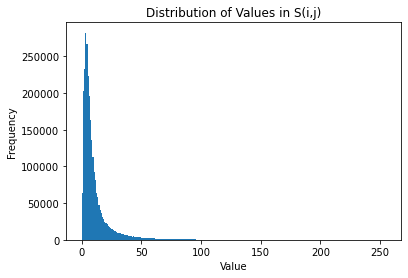

In [33]:
flat = grad_mag_norm.flatten()

# Plot a histogram of the values in the array
plt.hist(flat, bins=256)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Values in S(i,j)')
plt.show()


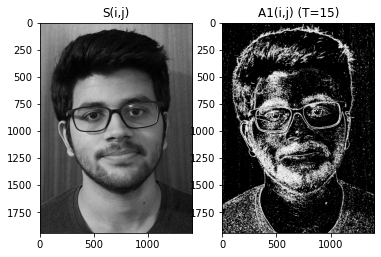

In [37]:
# Thresholding  to get A(i,j)

# Apply thresholding with threshold value of 150
threshold_value = 15
thresholded_img = (grad_mag_norm > threshold_value) * 255

# Plot the original and thresholded images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(img, cmap='gray')
ax1.set_title('S(i,j)')
ax2.imshow(thresholded_img, cmap='gray')
ax2.set_title('A1(i,j) (T={})'.format(threshold_value))
plt.show()
